# Diandra O'Connor, Module 7 Project 2/20/23

#### time_series_exercise.ipynb

## Task 3, exercise from 10.16 (starting on page 414)

### Create a lambda to convert Fahrenheit temperatures to Celsius; store each pair as a tuple

In [92]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]  # temps from 0-100 in 10 degree increments

### Place data in a DataFrame, use plot method to show linear relationship between Fahrenheit and Celsius temperatures

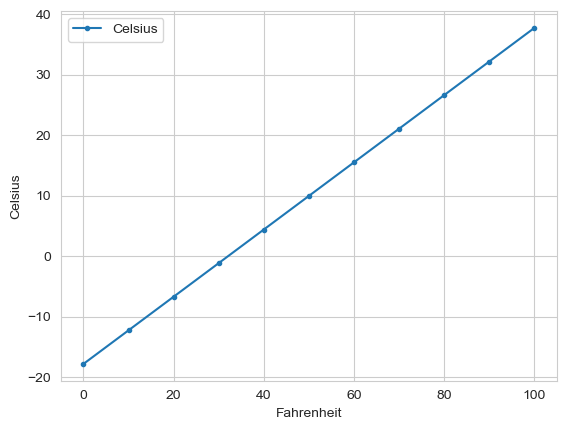

In [93]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')  

y_label = axes.set_ylabel('Celsius')  # set y-axis label to Celsius

### Load average temperature into a DataFrame

In [94]:
nyc = pd.read_csv('NYC_temps_csv.csv')  # avg temp rather than avg high temp, years 1895-2023, data from NOAA website

### Display head and tail of DataFrame

In [95]:
nyc.head()

,Date,Value,Anomaly
0,189501,28.4,-2.8
1,189601,28.0,-3.2
2,189701,28.8,-2.4
3,189801,33.4,2.2
4,189901,29.3,-1.9


In [96]:
nyc.tail()  

,Date,Value,Anomaly
124,201901,32.6,1.4
125,202001,39.2,8.0
126,202101,34.8,3.6
127,202201,30.4,-0.8
128,202301,43.5,12.3


### Rename 'Value' column as 'Temperature' for readability

In [97]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head()

,Date,Temperature,Anomaly
0,189501,28.4,-2.8
1,189601,28.0,-3.2
2,189701,28.8,-2.4
3,189801,33.4,2.2
4,189901,29.3,-1.9


### Check column type

In [98]:
nyc.Date.dtype

dtype('int64')

### Floor divide by 100 to truncate the last 2 digits (01)

In [99]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,28.4,-2.8
1,1896,28.0,-3.2
2,1897,28.8,-2.4


### Calculate basic descriptive statistics using describe()

In [100]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()  # note 129 observations rather than 124 as I used data from 1895-2023

count    129.00
mean      31.58
std        4.58
min       20.50
25%       28.70
50%       31.30
75%       34.50
max       43.50
Name: Temperature, dtype: float64

### Calculate a regression line's slope and intercept using linregress from the stats module of SciPy

In [101]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [102]:
linear_regression.slope

0.030204606440071554

In [103]:
linear_regression.intercept

-27.587103085867618

### Use the linear regression equation for a straight line (y = mx + b) to predict the temperature for the year 2026

In [104]:
linear_regression.slope * 2026 + linear_regression.intercept

33.60742956171735

### Using the same equation, approximate what the temperature might have been in 1890

In [105]:
linear_regression.slope * 1890 + linear_regression.intercept

29.49960308586762

### Create a scatter plot with a best fit (regression) line

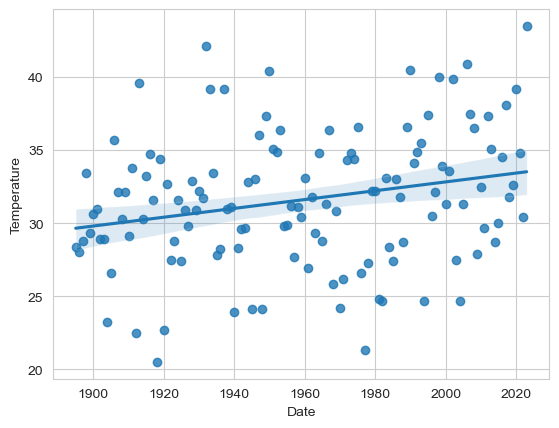

In [106]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)



### Scale y-axis values to emphasize the linear relationship

(10.0, 70.0)

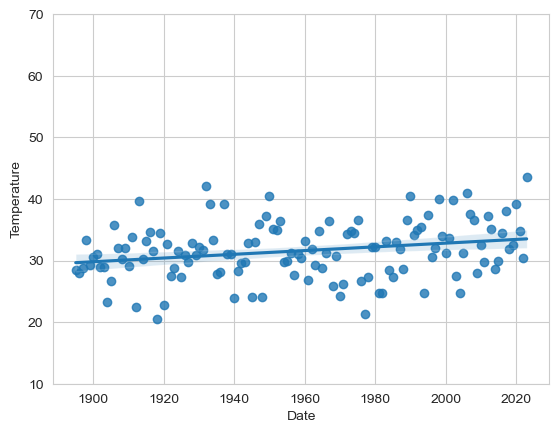

In [107]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)  # change y-axis to a 60 degree range, from 10 to 70

## Task 3, exercise from 15.4 (starting on page 620)

## Using scikit-learn estimator

### Display the first 3 rows of data

In [108]:
nyc.head(3)  # same dataset from above examples

,Date,Temperature,Anomaly
0,1895,28.4,-2.8
1,1896,28.0,-3.2
2,1897,28.8,-2.4


### Split the data into training and testing sets

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

### Confirm the 75%-25% train-test spilt by checking the shapes of X_train and X_test

In [111]:
X_train.shape

(96, 1)

In [112]:
X_test.shape

(33, 1)

### Training the model

In [113]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

### Get the slope and intercept of the regression line

In [114]:
linear_regression.coef_   # slope is stored in the coeff_attribute (the m in the equation)

array([0.02654159])

In [115]:
linear_regression.intercept_  # intercept is stored in the intercept_attribute (the b in the equation)

-20.64745884965625

### Test the model using data in X_test and check predictions

In [116]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):   # display predicted and expected values for every 5th element
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 29.65, expected: 28.40
predicted: 31.37, expected: 33.10
predicted: 31.69, expected: 34.30
predicted: 32.57, expected: 31.30
predicted: 32.65, expected: 36.50
predicted: 32.41, expected: 33.90
predicted: 30.23, expected: 31.60


### Predict future temperature and estimate past temperatures

#### Temperature prediction for year 2026

In [117]:
predict = (lambda x: linear_regression.coef_* x + linear_regression.intercept_)

predict(2026)

array([33.12581252])

#### Temperature estimation for year 1890

In [118]:
predict(1890)

array([29.51615561])

### Create a scatter plot using Seaborn's scatterplot function and Matplotlib's plot function

#### Display data points using scatterplot

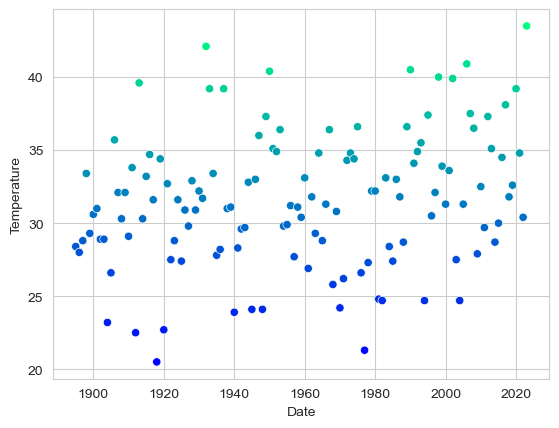

In [119]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

#### Scale the y-axis to better see the linear relationship

(10.0, 70.0)

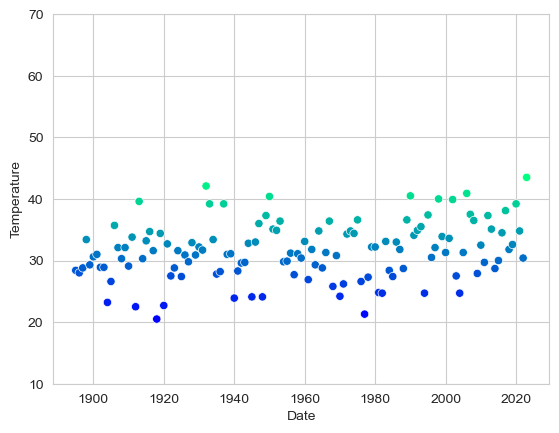

In [120]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

### Display the regression line

In [121]:
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)


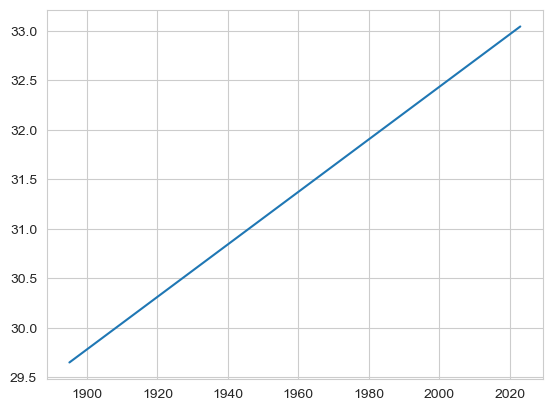

In [122]:
import matplotlib.pyplot as plt

line = plt.plot(x, y)


### Display the regression line on the scatterplot

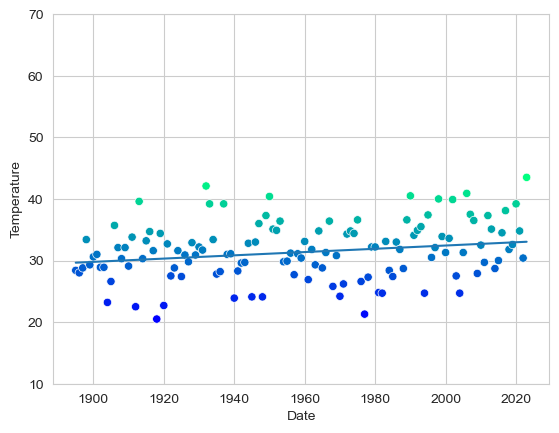

In [123]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

line = plt.plot(x, y)

### Method comparison

Both methods resulted in similar values.  The sklearn method uses simpler code to predict/estimate values.
I liked the ability to use hue with Seaborn's scatterplot function.  It seems like that might allow better visualization for certain datasets rather than using Seaborn's regplot.

##### Above examples from "Intro to Python" by Paul Deitel and Harvey Dietel, Copyright 2020